In [1]:
%matplotlib notebook
from matplotlib import pylab

import matplotlib.pyplot as plt
import numpy as np

pylab.rcParams['figure.figsize'] = (12, 12)

In [2]:
# Generate data clusters
mu1 = np.array([1, 0])
mu2 = np.array([0, 1])
mu3 = np.array([0.8, 0.8])
cov = np.array([[2, 1], [1, 2]])
X1 = np.random.multivariate_normal(mu1, 0.05*cov, 500)
X2 = np.random.multivariate_normal(mu2, 0.05*cov, 500)
X3 = np.random.multivariate_normal(mu3, 0.05*cov, 500)
data = np.append(X1, X2, axis = 0)
data = np.append(data, X3, axis=0)

<IPython.core.display.Javascript object>


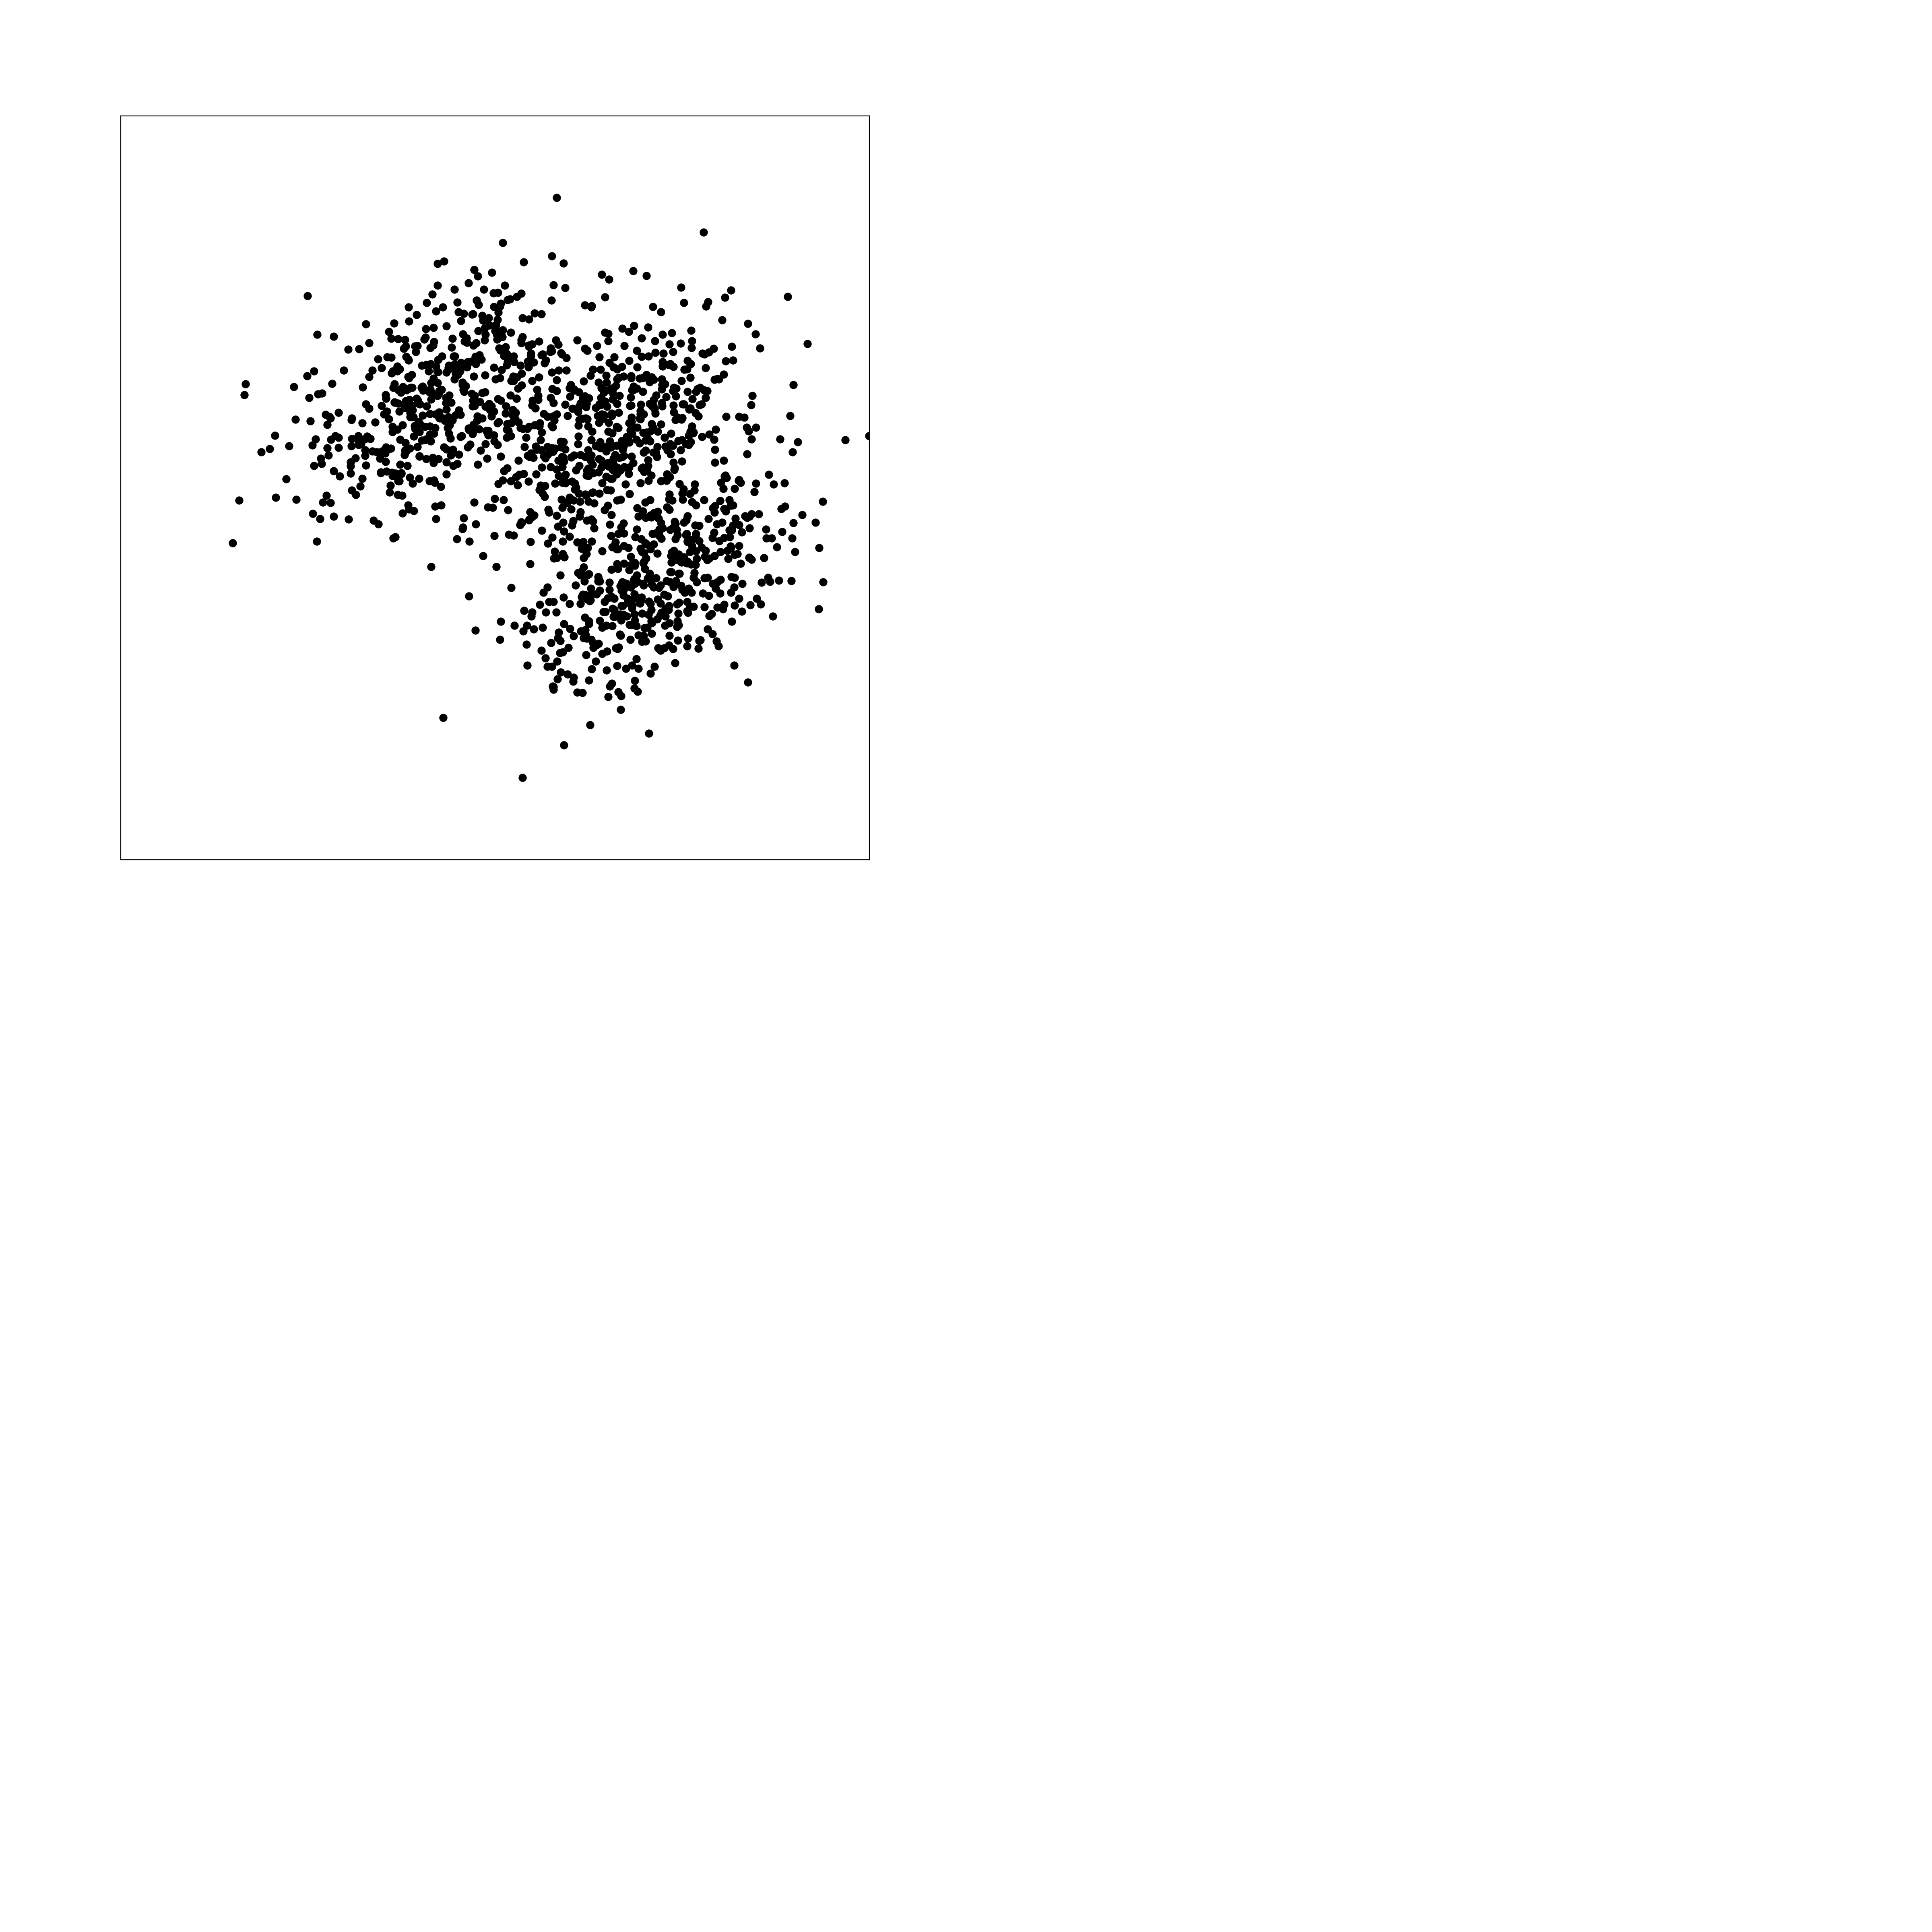

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks(())
ax.set_yticks(())
ax.set_xlim(-1.5, 2)
ax.set_ylim(-1.5, 2.5)
plt.scatter(X1[:, 0], X1[:,1], c='k', s=40)
plt.scatter(X2[:, 0], X2[:,1], c='k', s=40)
plt.scatter(X3[:, 0], X3[:,1], c='k', s=40)

In [4]:
def k_means(data, init_means, iterations):
    n_data, ndim = data.shape
    k = init_means.shape[0]
    old_means = np.array(init_means)
    means = np.array(init_means)
    distances = np.zeros([n_data, k])
    c_assignments = np.zeros([n_data])
    for t in range(iterations):
        for j in range(k):
            distances[:, j] = np.apply_along_axis(lambda x: np.linalg.norm(x - means[j]), 1, data)
        c_assignments = np.argmin(distances, 1)
        old_means = np.array(means)
        means = np.zeros([k, ndim])
        c_counts = np.zeros([k])
        for i in range(n_data):
            c_counts[c_assignments[i]] += 1
            means[c_assignments[i]] += data[i]
        for j in range(k):
            means[j] /= c_counts[j]
    return c_assignments, old_means, means

In [5]:
np.random.seed(1)
init_means = np.array(np.random.rand(3, 2))
c, m, mm = k_means(data, init_means, 13)

<IPython.core.display.Javascript object>


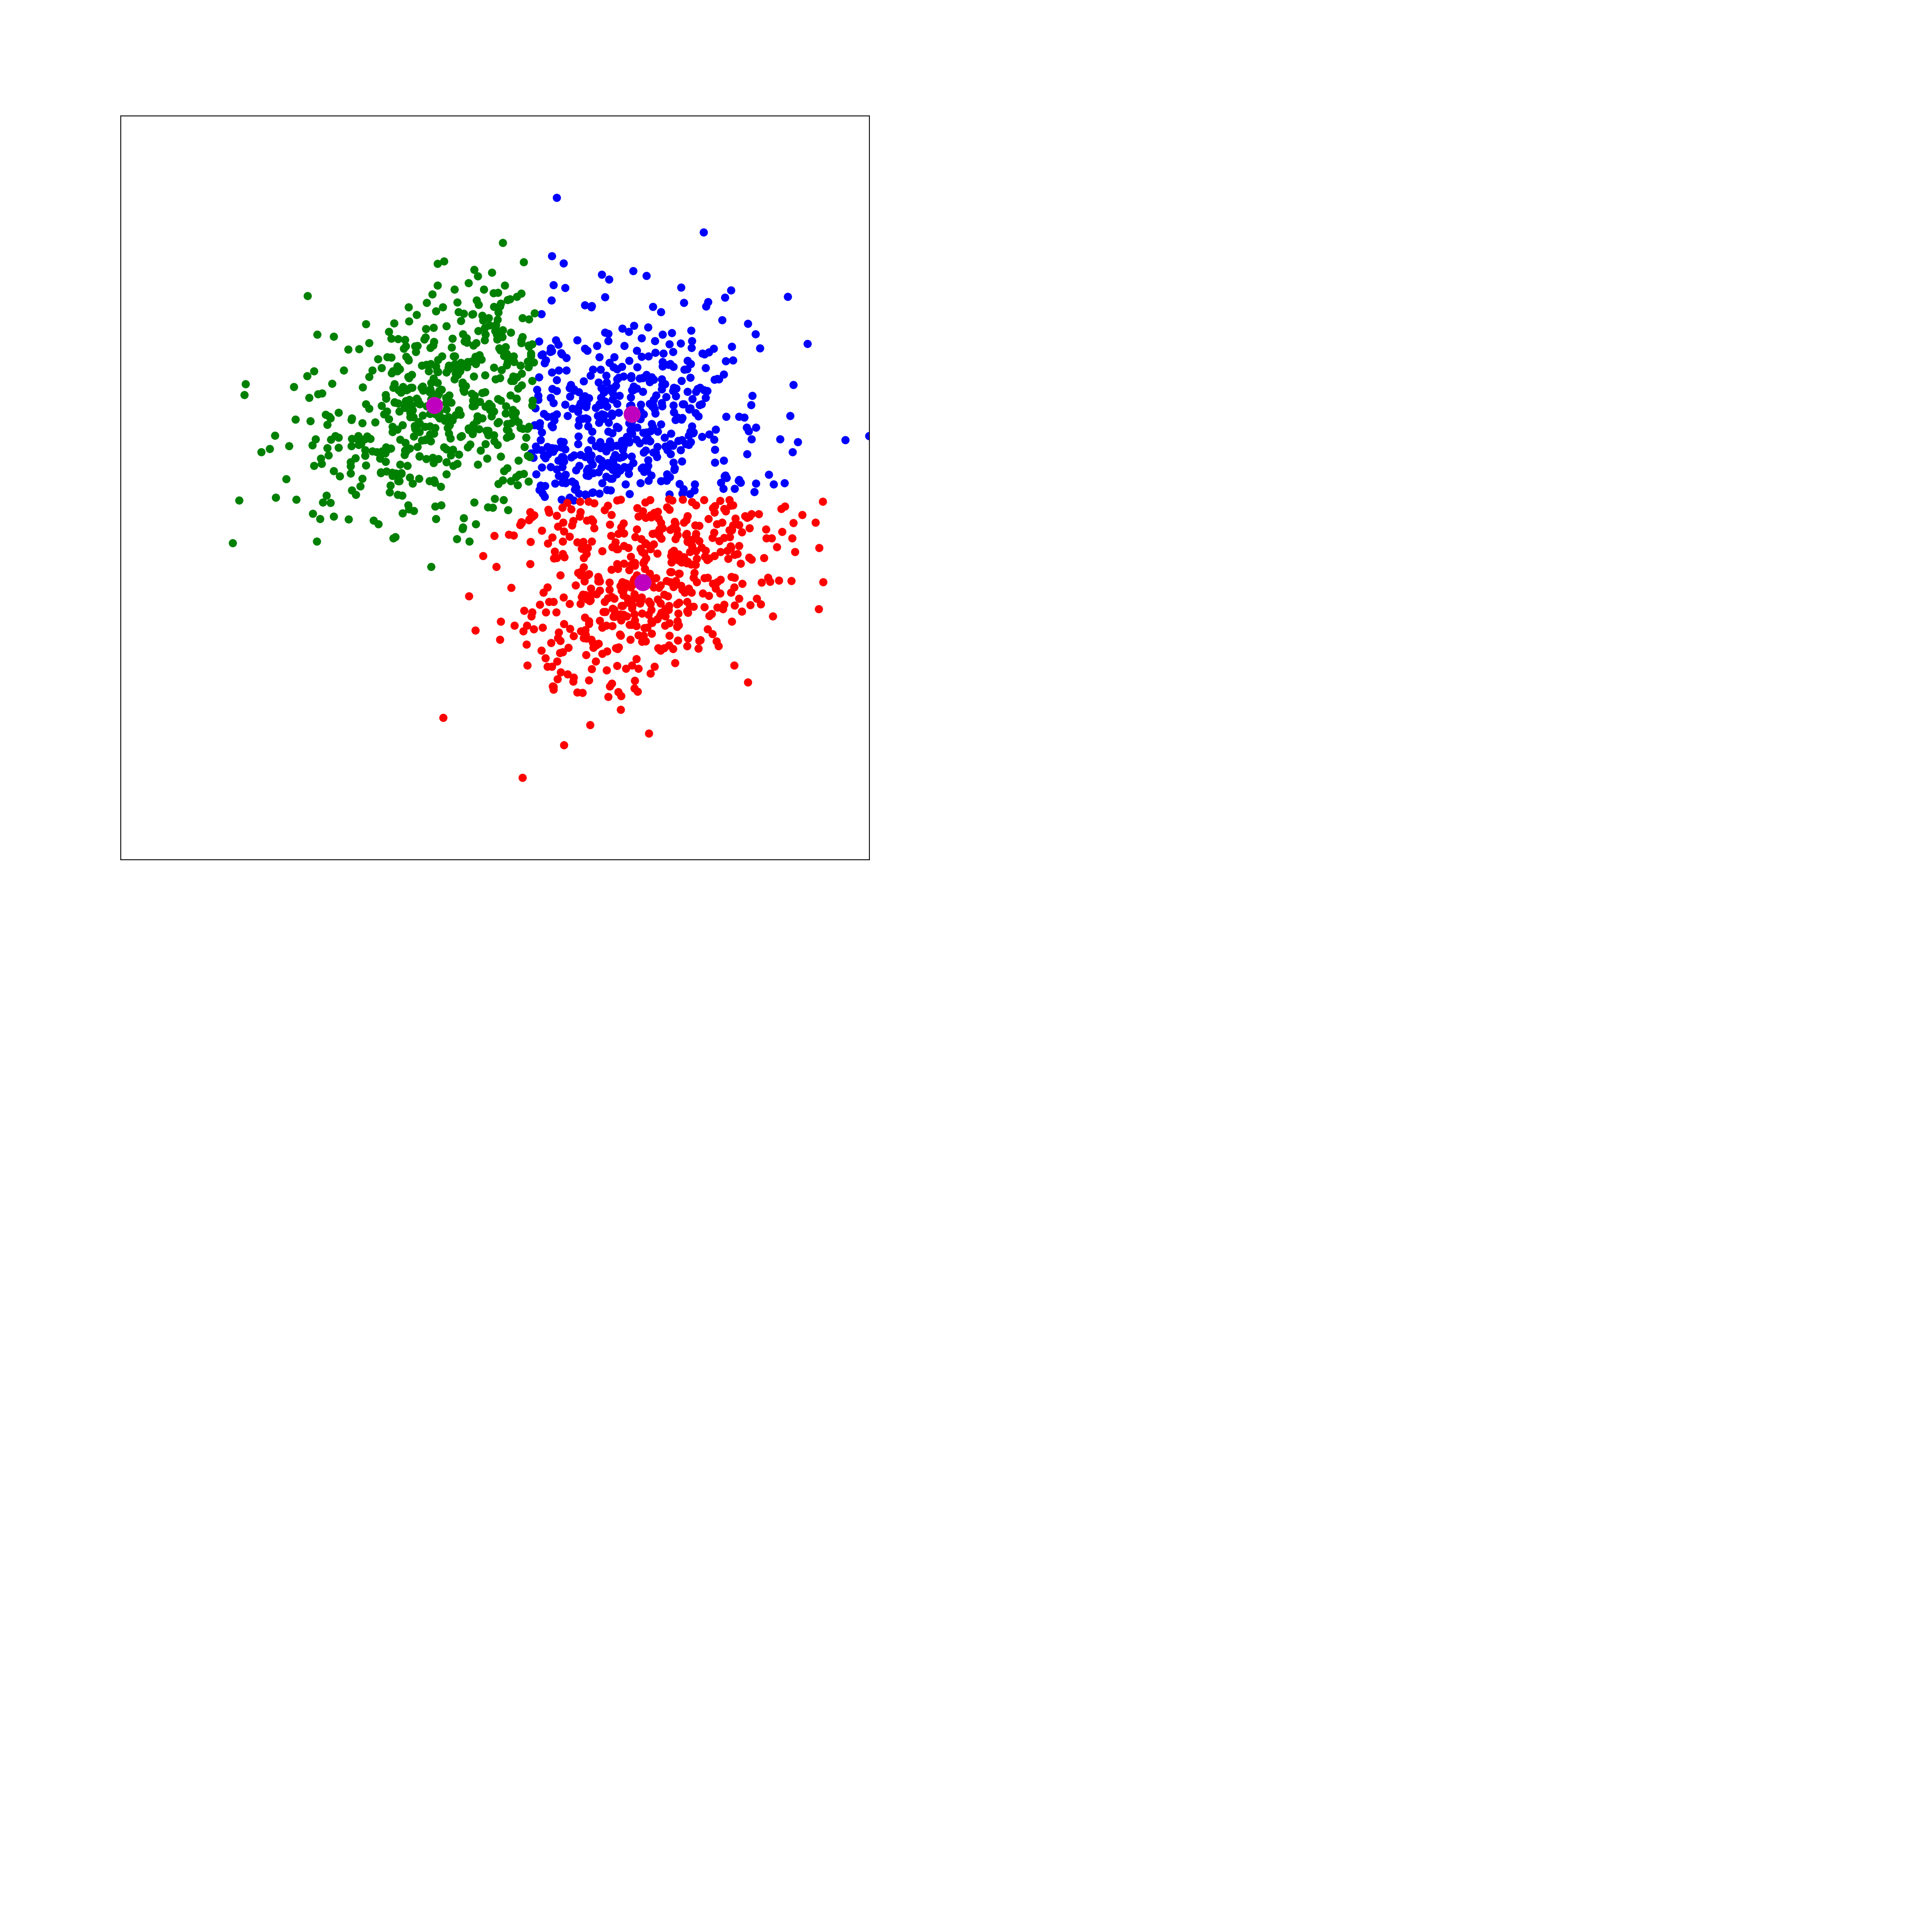

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-1.5, 2)
ax.set_ylim(-1.5, 2.5)
ax.scatter(data[c==0][:, 0], data[c==0][:, 1], c='b', s=40)
ax.scatter(data[c==1][:, 0], data[c==1][:, 1], c='g', s=40)
ax.scatter(data[c==2][:, 0], data[c==2][:, 1], c='r', s=40)
ax.scatter(m[:, 0], m[:, 1], c='y', s=200)
ax.scatter(mm[:, 0], mm[:, 1], c='m', s=200)
ax.set_xticks(())
ax.set_yticks(())
if np.linalg.norm(m - mm, 'fro') > 1e-4:
    ax.arrow(m[0, 0], m[0, 1], 0.8*(mm[0, 0]-m[0, 0]), 0.8*(mm[0, 1]-m[0, 1]), fc='k',ec='k', lw=4, head_width=0.05)
    ax.arrow(m[1, 0], m[1, 1], 0.8*(mm[1, 0]-m[1, 0]), 0.8*(mm[1, 1]-m[1, 1]), fc='k',ec='k', lw=4, head_width=0.05)
    ax.arrow(m[2, 0], m[2, 1], 0.8*(mm[2, 0]-m[2, 0]), 0.8*(mm[2, 1]-m[2, 1]), fc='k',ec='k', lw=4, head_width=0.05)

In [7]:
np.random.seed(1)
init_means = np.array(np.random.rand(4, 2))
c2, m2, mm2 = k_means(data, init_means, 20)

<IPython.core.display.Javascript object>


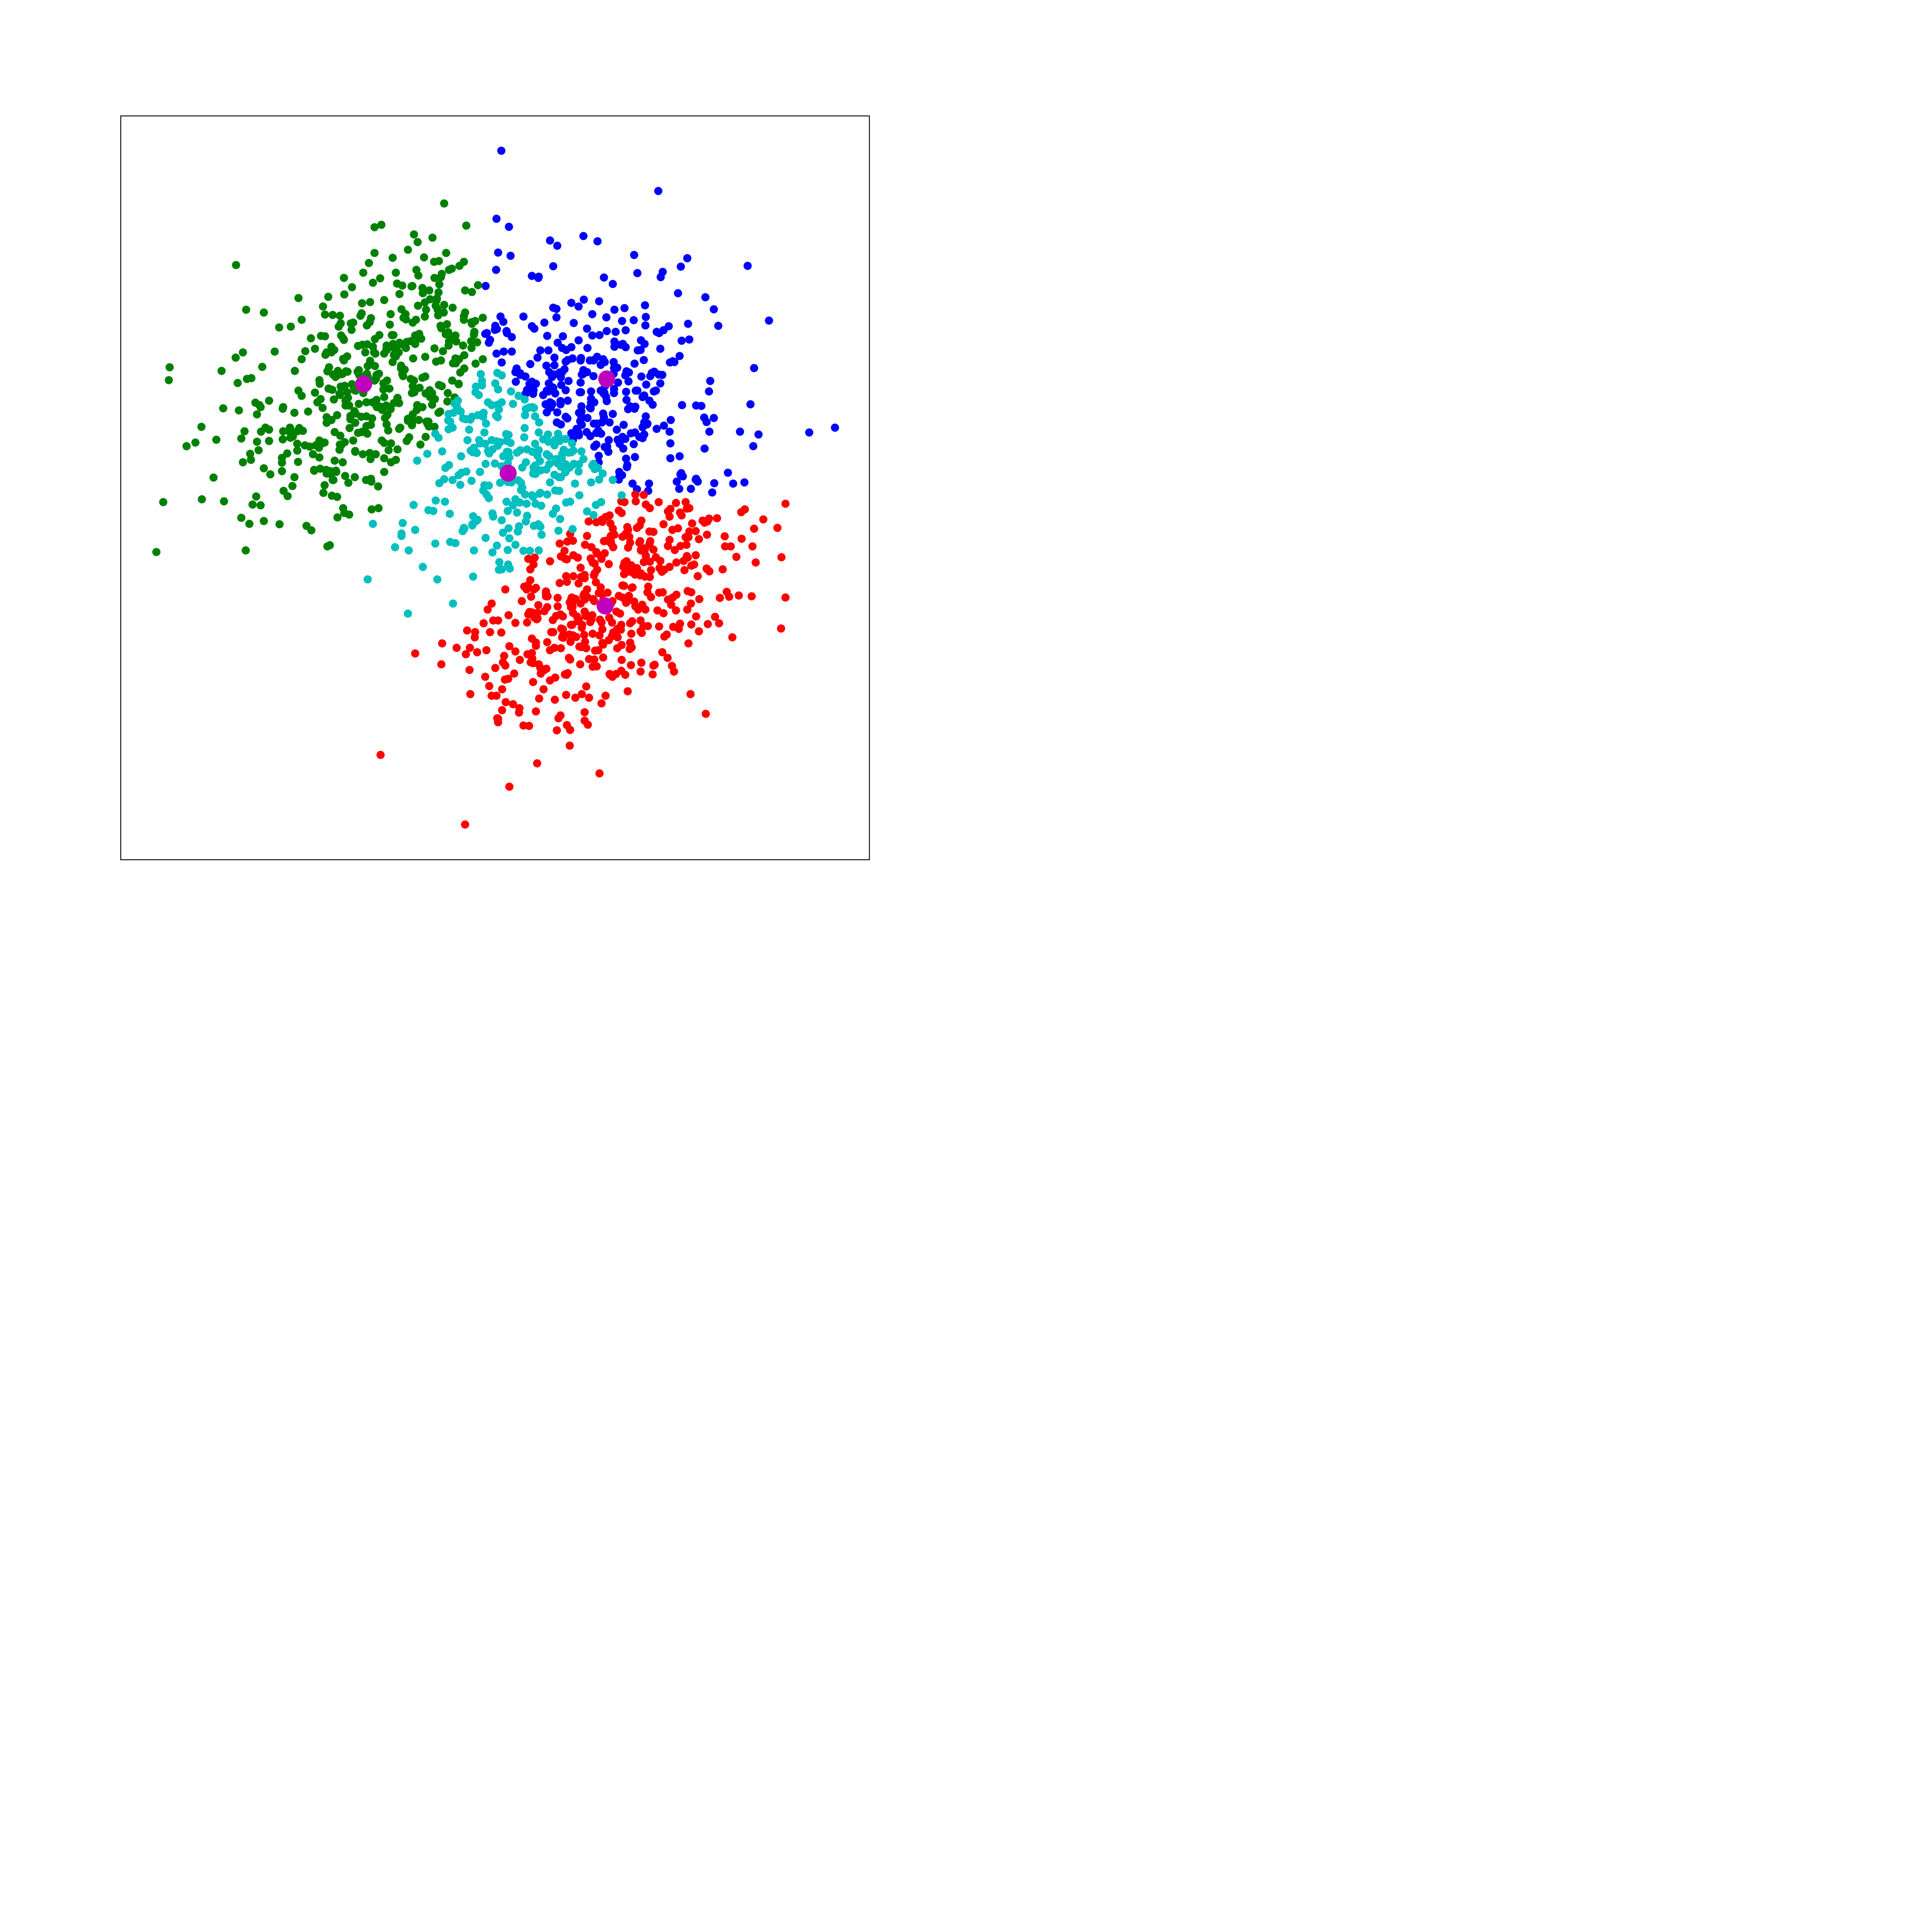

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data[c2==0][:, 0], data[c2==0][:, 1], c='b', s=40)
ax.scatter(data[c2==1][:, 0], data[c2==1][:, 1], c='g', s=40)
ax.scatter(data[c2==2][:, 0], data[c2==2][:, 1], c='r', s=40)
ax.scatter(data[c2==3][:, 0], data[c2==3][:, 1], c='c', s=40)
ax.scatter(m2[:, 0], m2[:, 1], c='y', s=200)
ax.scatter(mm2[:, 0], mm2[:, 1], c='m', s=200)
ax.set_xticks(())
ax.set_yticks(())
if np.linalg.norm(m2 - mm2, 'fro') > 1e-4:
    ax.arrow(m2[0, 0], m2[0, 1], 0.8*(mm2[0, 0]-m2[0, 0]), 0.8*(mm2[0, 1]-m2[0, 1]), fc='k',ec='k', lw=4, head_width=0.05)
    ax.arrow(m2[1, 0], m2[1, 1], 0.8*(mm2[1, 0]-m2[1, 0]), 0.8*(mm2[1, 1]-m2[1, 1]), fc='k',ec='k', lw=4, head_width=0.05)
    ax.arrow(m2[2, 0], m2[2, 1], 0.8*(mm2[2, 0]-m2[2, 0]), 0.8*(mm2[2, 1]-m2[2, 1]), fc='k',ec='k', lw=4, head_width=0.05)
    ax.arrow(m2[3, 0], m2[3, 1], 0.8*(mm2[3, 0]-m2[3, 0]), 0.8*(mm2[3, 1]-m2[3, 1]), fc='k',ec='k', lw=4, head_width=0.05)

In [9]:
np.random.seed(0)
mu1 = np.array([-1, 0])
mu2 = np.array([1, 0])
cov1 = np.array([[0.3, 0], [0, 10.]])   # for good standardization
cov2 = np.array([[0.3, 0], [0, 0.08]])  # for bad standardization
X1 = np.random.multivariate_normal(mu1, cov1, 500)
X2 = np.random.multivariate_normal(mu2, cov1, 500)
data = np.append(X1, X2, axis=0)
mean = np.mean(data, 0)
std = np.std(data, 0)
data2 = np.apply_along_axis(lambda x: x - mean, 1, data)
data2[:, 0] /= std[0]
data2[:, 1] /= std[1]

In [10]:
np.random.seed(1) # Use seed 0 for bad standardisation, seed 1 for good standardization
init_means = np.random.rand(2, 2)
c, m, mm = k_means(data, init_means, 10)
c2, m2, mm2 = k_means(data2, init_means, 10)

<IPython.core.display.Javascript object>


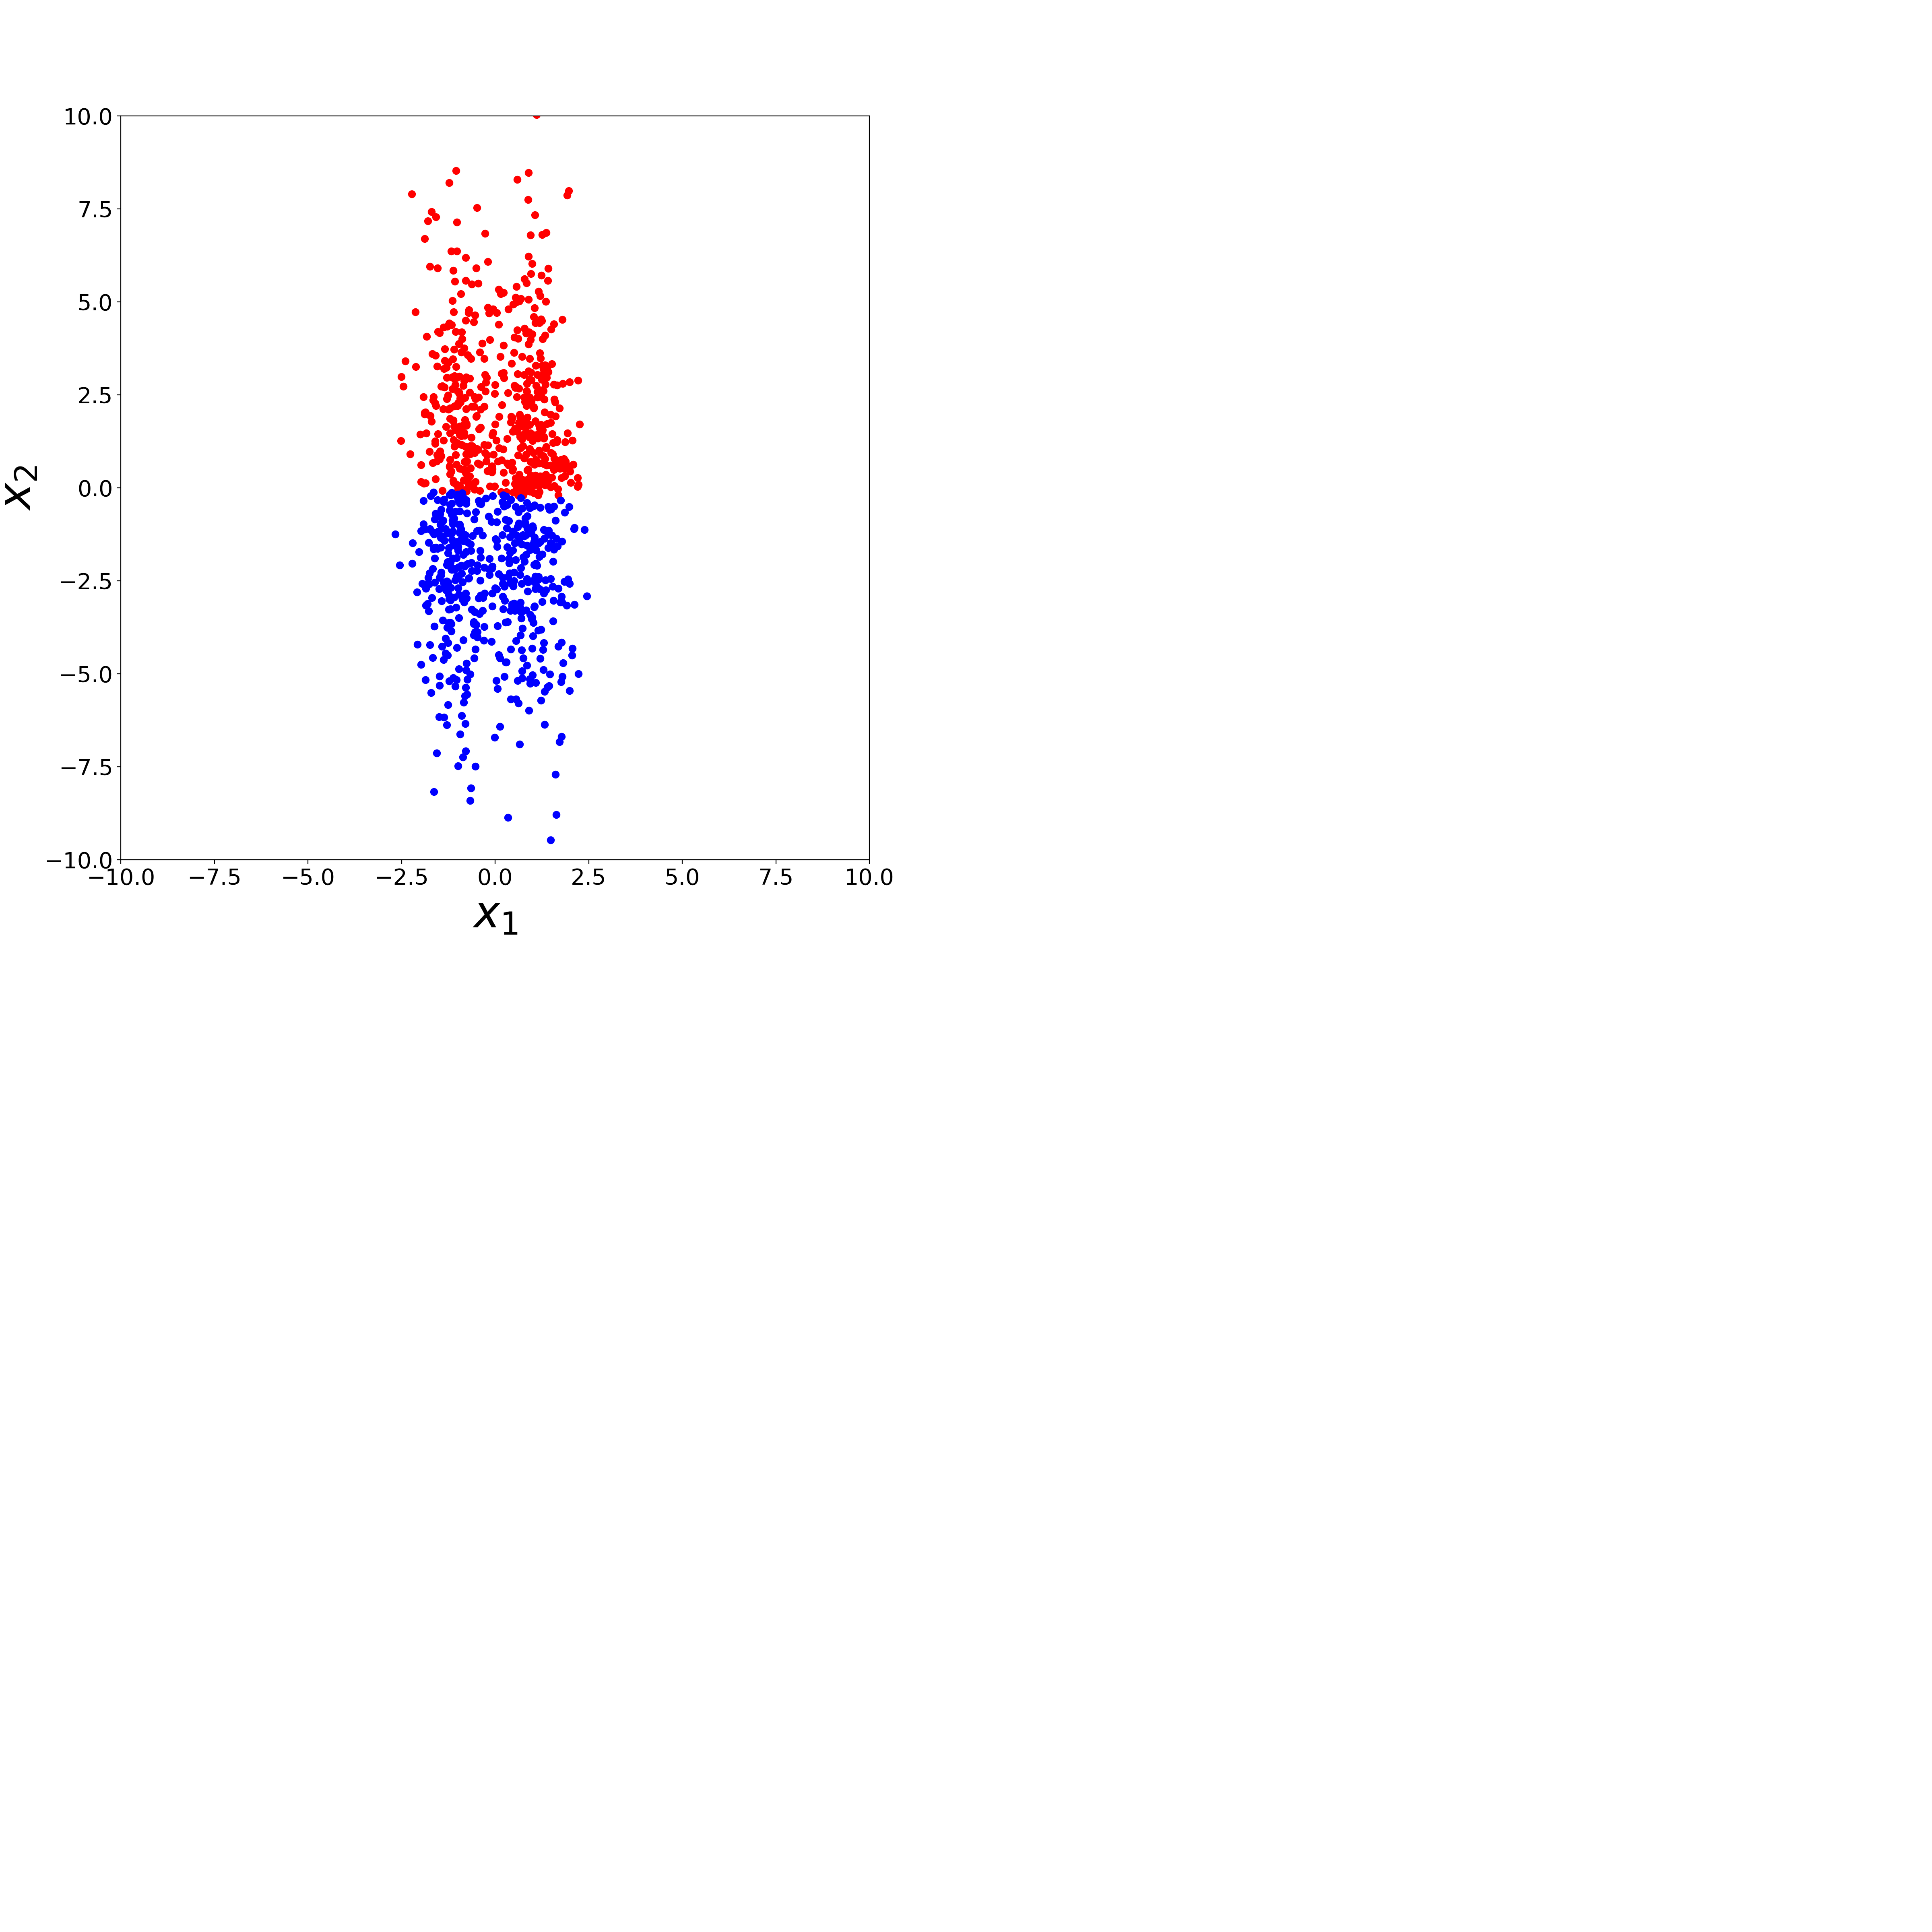

<IPython.core.display.Javascript object>


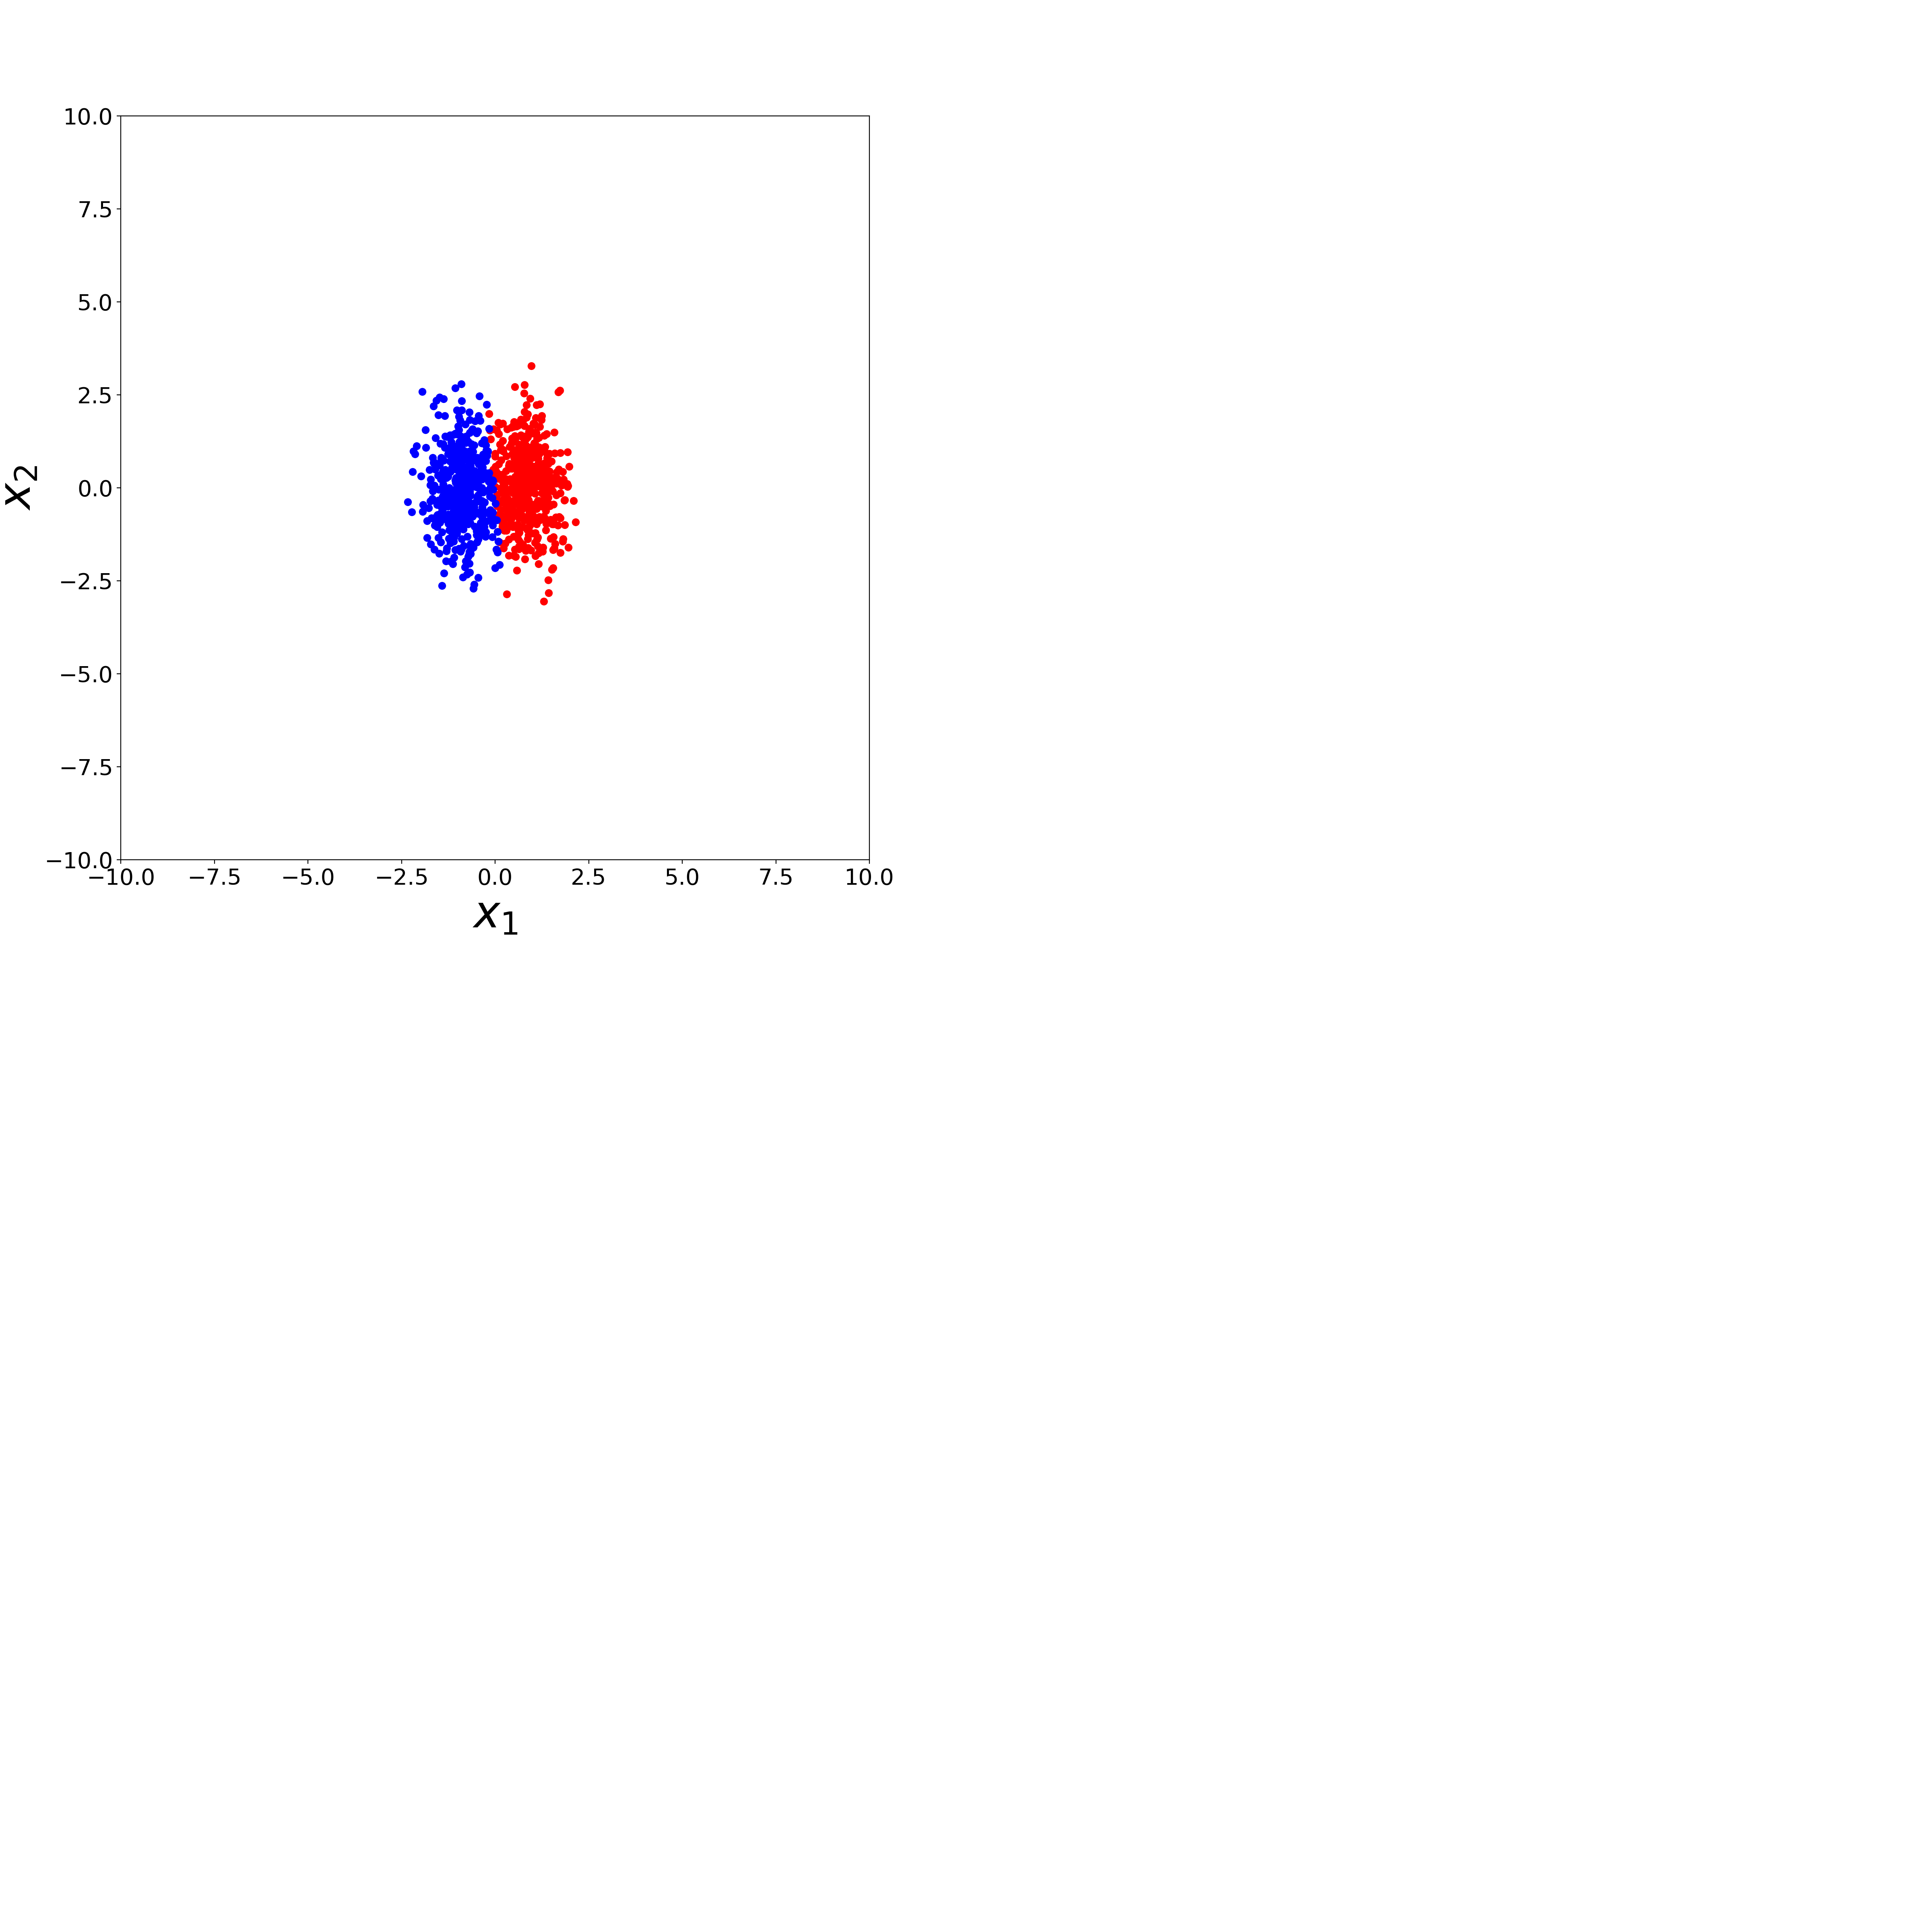

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('$x_1$', size=40)
ax.set_ylabel('$x_2$', size=40)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.scatter(data[c==0][:, 0], data[c==0][:, 1], c='r')
ax.scatter(data[c==1][:, 0], data[c==1][:, 1], c='b')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('$x_1$', size=40)
ax.set_ylabel('$x_2$', size=40)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.scatter(data2[c2==0][:, 0], data2[c2==0][:, 1], c='r')
ax.scatter(data2[c2==1][:, 0], data2[c2==1][:, 1], c='b')